### Import dataset


---



*   Removing unnecessary columns from dataframe 
*   Adding columns: Total cost, Mean Damage 




In [134]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
df = pd.read_csv("H3Units.csv")
df['Mean Damage'] = (df['Maximum Damage'] + df['Minimum Damage'])/2
df = df.drop(columns = ['Additional_item', 'Minimum Damage', 'Maximum Damage', 'AI_Value'])
df["Total_Cost"] = df.Gold * df.Growth

df.head(5)

,Unit_name,Castle,Level,Attack,Defence,Health,Speed,Growth,Gold,Special_abilities,Mean Damage,Total_Cost
0,Pikeman,Castle,1,4,5,10,4,14,60,Immunetojousting,2.0,840
1,Halberdier,Castle,1+,6,5,10,5,14,75,Immunetojousting,2.5,1050
2,Archer,Castle,2,6,3,10,4,9,100,Ranged(12shots),2.5,900
3,Marksman,Castle,2+,6,3,10,6,9,150,"Ranged(24shots),Doubleattack",2.5,1350
4,Griffin,Castle,3,8,8,25,6,7,200,"Flying,Tworetaliations",4.5,1400


### Select basic creatures 


---



In [162]:
basic = ['1', '2', '3', '4', '5', '6', '7']
basic_unit_df = df[df['Level'].isin(basic)] 
basic_unit_df = basic_unit_df[basic_unit_df.Castle != 'Neutral']
basic_unit_df.loc[basic_unit_df['Castle'] == "Castle"]

,Unit_name,Castle,Level,Attack,Defence,Health,Speed,Growth,Gold,Special_abilities,Mean Damage,Total_Cost
0,Pikeman,Castle,1,4,5,10,4,14,60,Immunetojousting,2.0,840
2,Archer,Castle,2,6,3,10,4,9,100,Ranged(12shots),2.5,900
4,Griffin,Castle,3,8,8,25,6,7,200,"Flying,Tworetaliations",4.5,1400
6,Swordsman,Castle,4,10,12,35,5,4,300,-,7.5,1200
8,Monk,Castle,5,12,7,30,5,3,400,Ranged(12shots),11.0,1200
10,Cavalier,Castle,6,15,15,100,7,2,1000,Jousting,20.0,2000
12,Angel,Castle,7,20,20,200,12,1,3000,"Flying,HatesDevils,Morale+1",50.0,3000


### Select upgraded creatures 


---



In [169]:
upgraded = ['1+', '2+', '3+', '4+', '5+', '6+', '7+', '3+*', '4+*', '5+*']
upgraded_unit_df = df[df['Level'].isin(upgraded)] #upframe - only upgraded units
upgraded_unit_df = upgraded_unit_df[upgraded_unit_df.Castle != 'Neutral']
upgraded_unit_df.loc[upgraded_unit_df['Castle'] == "Conflux"]

,Unit_name,Castle,Level,Attack,Defence,Health,Speed,Growth,Gold,Special_abilities,Mean Damage,Total_Cost
113,Sprite,Conflux,1+,2,2,3,9,20,30,"Flying,Noenemyretaliation",2.0,600
115,StormElemental,Conflux,2+,9,9,25,8,6,275,"Ranged(24shots),Elemental,Lightningvulnerabili...",5.0,1650
117,IceElemental,Conflux,3+*,8,10,30,6,6,375,"Ranged(24shots),Elemental,VulnerabletoFireball...",5.0,2250
119,EnergyElemental,Conflux,4+*,12,8,35,8,5,400,"Elemental,Flying,Icevulnerability,Fireimmunity...",5.0,2000
121,MagmaElemental,Conflux,5+*,11,11,40,6,4,500,"Elemental,MeteorShowervulnerability,Lightninga...",8.0,2000
123,MagicElemental,Conflux,6+,15,13,80,9,2,800,"Elemental,Noenemyretaliation,Attacksadjacenthe...",20.0,1600
125,Phoenix,Conflux,7+,21,18,200,21,2,2000,"Flying,Breathattack,Fireimmunity,Rebirth",35.0,4000


### The sum of attack, defence etc. for basic creatures in each castle 


---



In [170]:
basic_unit_sum= basic_unit_df.copy()
basic_unit_sum=basic_unit_sum.groupby(basic_unit_sum.Castle).sum()
basic_unit_sum

,Attack,Defence,Health,Speed,Growth,Gold,Mean Damage,Total_Cost
Castle,,,,,,,,
Castle,75,70,410,43,40,5060,97.5,10540
Conflux,72,70,358,51,45,3575,72.5,11650
Dungeon,76,68,376,44,39,4580,93.5,10390
Fortress,66,77,390,39,39,4230,81.5,10025
Inferno,76,69,372,47,38,4725,87.0,9750
Necropolis,73,66,369,40,37,4270,87.0,10210
Rampart,71,67,398,43,40,4240,93.5,9740
Stronghold,77,58,360,38,41,3440,88.0,8550
Tower,74,68,375,37,41,4310,101.0,9800


### The sum of attack, defence etc. for upgraded creatures in each castle


---



In [171]:
upgraded_unit_sum= upgraded_unit_df.copy()
upgraded_unit_sum=upgraded_unit_sum.groupby(upgraded_unit_sum.Castle).sum()
upgraded_unit_sum

,Attack,Defence,Health,Speed,Growth,Gold,Mean Damage,Total_Cost
Castle,,,,,,,,
Castle,91,85,460,60,40,7515,101.5,14430
Conflux,78,71,413,67,45,4380,80.0,14100
Dungeon,87,82,502,61,39,6470,93.5,13375
Fortress,73,86,471,54,39,6050,86.5,13120
Inferno,86,81,417,64,38,7055,87.0,13430
Necropolis,78,73,444,55,37,6025,88.0,13250
Rampart,82,78,500,61,40,6115,93.5,12585
Stronghold,83,62,525,53,41,5555,88.5,12065
Tower,84,79,535,55,41,8050,111.0,15080


### A function to show which castle has the best (Attack, Defence, Health - column names) based on upgraded units.


---



In [172]:
def show_the_best_castle(cols, palette):
  plt.figure(figsize=(14,5))
  title = f'The sum of units {str(cols)} in different castles'
  sns.set(font_scale=1.3)
  sns.barplot(x=upgraded_unit_sum.sort_values(cols).index,y=upgraded_unit_sum.sort_values(cols)[cols],  palette=palette).set_title(title)

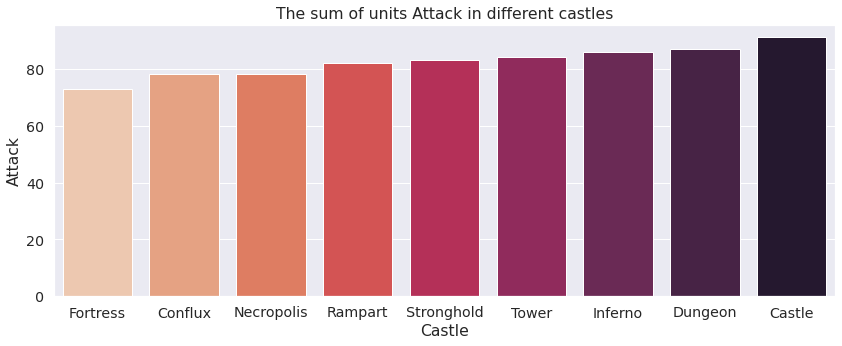

In [173]:
show_the_best_castle("Attack", "rocket_r")

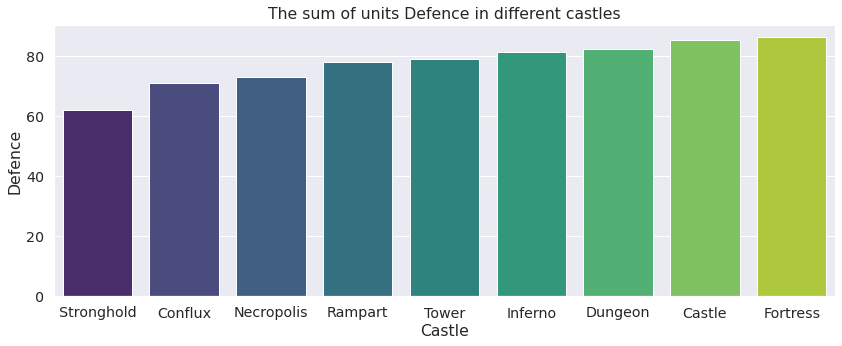

In [174]:
show_the_best_castle("Defence", "viridis")

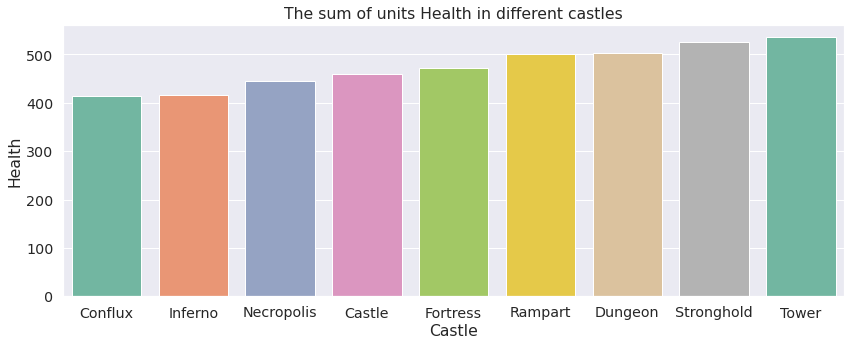

In [175]:
show_the_best_castle("Health", "Set2")

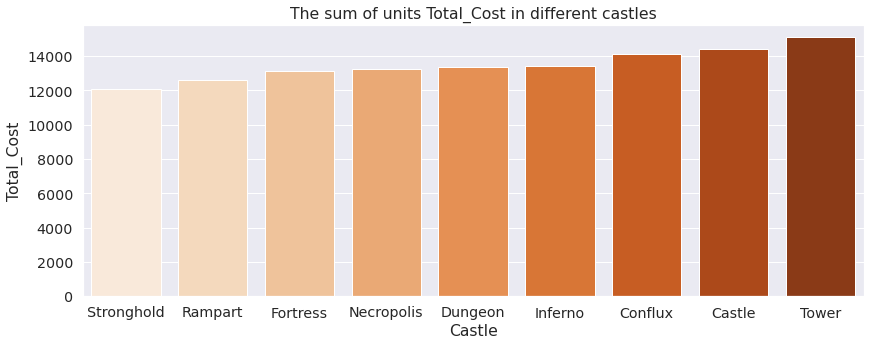

In [176]:
show_the_best_castle("Total_Cost", "Oranges")

### Comparison between basic and upgraded creatures.


---



In [187]:
def compare_creatures(cols):
  labels = upgraded_unit_sum.index
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars
  fig, ax = plt.subplots(figsize = (15,6))
  bar1 = ax.bar(x + width/2, upgraded_unit_sum[cols], width, label='Upgraded', color = 'skyblue'  )
  bar2 = ax.bar( x - width/2,basic_unit_sum[cols], width, label='Basic', color =  'lightcoral')
  ax.set_ylabel(str(cols))
  ax.set_title('Comparison between basic and upgraded creatures.')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

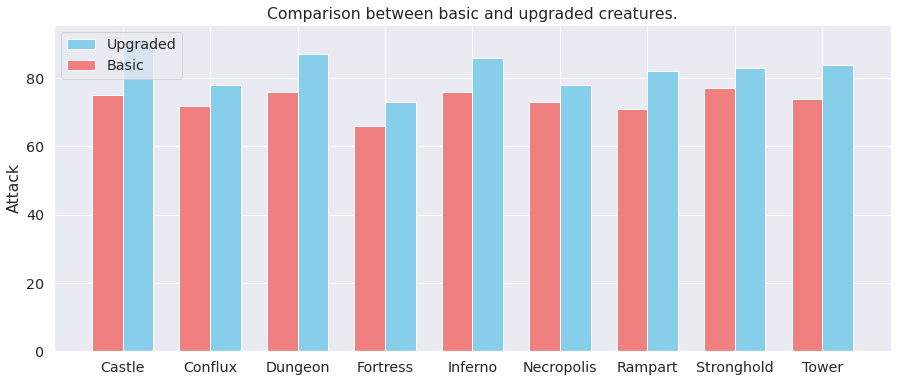

In [188]:
compare_creatures("Attack")

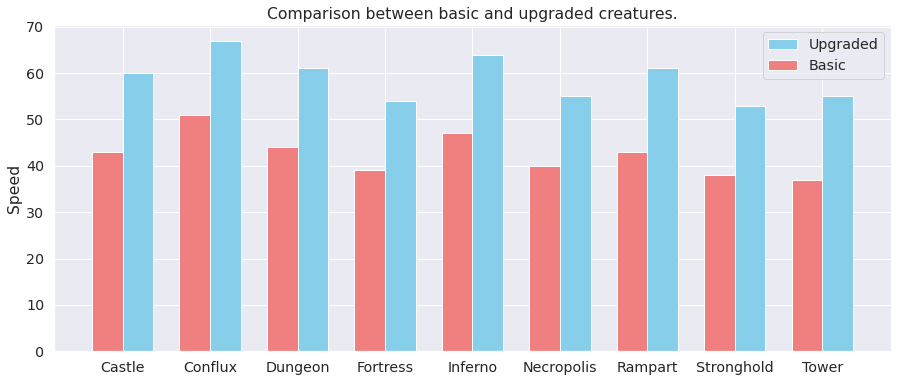

In [189]:
compare_creatures("Speed")

In [195]:
basic_unit_sum

,Attack,Defence,Health,Speed,Growth,Gold,Mean Damage,Total_Cost
Castle,,,,,,,,
Castle,75,70,410,43,40,5060,97.5,10540
Conflux,72,70,358,51,45,3575,72.5,11650
Dungeon,76,68,376,44,39,4580,93.5,10390
Fortress,66,77,390,39,39,4230,81.5,10025
Inferno,76,69,372,47,38,4725,87.0,9750
Necropolis,73,66,369,40,37,4270,87.0,10210
Rampart,71,67,398,43,40,4240,93.5,9740
Stronghold,77,58,360,38,41,3440,88.0,8550
Tower,74,68,375,37,41,4310,101.0,9800


### Choosing the best castle based on creatures statistic. 


---



In [201]:
data = {'The highest attack': [ basic_unit_sum["Attack"].idxmax(), upgraded_unit_sum["Attack"].idxmax()], 
        'The highest defence ': [ basic_unit_sum["Defence"].idxmax(), upgraded_unit_sum["Defence"].idxmax()],
        'The highest health ': [ basic_unit_sum["Health"].idxmax(), upgraded_unit_sum["Health"].idxmax()],
        'The highest speed ': [ basic_unit_sum["Speed"].idxmax(),upgraded_unit_sum["Speed"].idxmax()],
        'The highest damage ': [ basic_unit_sum["Mean Damage"].idxmax(), upgraded_unit_sum["Mean Damage"].idxmax()],
        'The most expensive': [ basic_unit_sum["Total_Cost"].idxmax(), upgraded_unit_sum["Total_Cost"].idxmax()]
        
        }  
  
# Create DataFrame  
frame = pd.DataFrame(data) 
frame.index = ['basic units', 'upgraded units'] 
frame 

,The highest attack,The highest defence,The highest health,The highest speed,The highest damage,The most expensive
basic units,Stronghold,Fortress,Castle,Conflux,Tower,Conflux
upgraded units,Castle,Fortress,Tower,Conflux,Tower,Tower


In [ ]:
dragon = df.loc[df["Unit_name"].str.contains("Dragon") & df["Growth"] == 1]
dragon = dragon.sort_values("Gold")
dragon

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Special_abilities,Total_Cost
68,BoneDragon,Necropolis,7,17,15,25,50,150,9,1,3388,1800,"Dragon,Undead,Flying,Morale-1",1800
26,GreenDragon,Rampart,7,18,18,40,50,180,10,1,4872,2400,"Flying,Breathattack,Resistlvl1–3spells",2400
82,RedDragon,Dungeon,7,19,19,40,50,180,11,1,4702,2500,"Dragon,Flying,Breathattack,Resistlvl1-3spells",2500
69,GhostDragon,Necropolis,7+,19,17,25,50,200,14,1,4696,3000,"Dragon,Undead,Flying,Morale-1,Aging",3000
27,GoldDragon,Rampart,7+,27,27,40,50,250,16,1,8613,4000,"Flying,Breathattack,Resistlvl1–4spells",4000
83,BlackDragon,Dungeon,7+,25,25,40,50,300,15,1,8721,4000,"Dragon,Flying,Breathattack,Resistallspells,Hat...",4000
137,FaerieDragon,Neutral,7,20,20,20,30,500,15,1,19580,10000,"Dragon,Flying,Spellcaster,MagicMirror",10000
138,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Dragon,Flying,Breath,Acidbreath",15000
139,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Dragon,Crystalgeneration,Resistance+20%,Unliving",20000
140,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Dragon,Flying,Breath,Fear,Resistlvl1–3spells,R...",30000


Text(0.5, 1.0, 'Cost of a dragon')

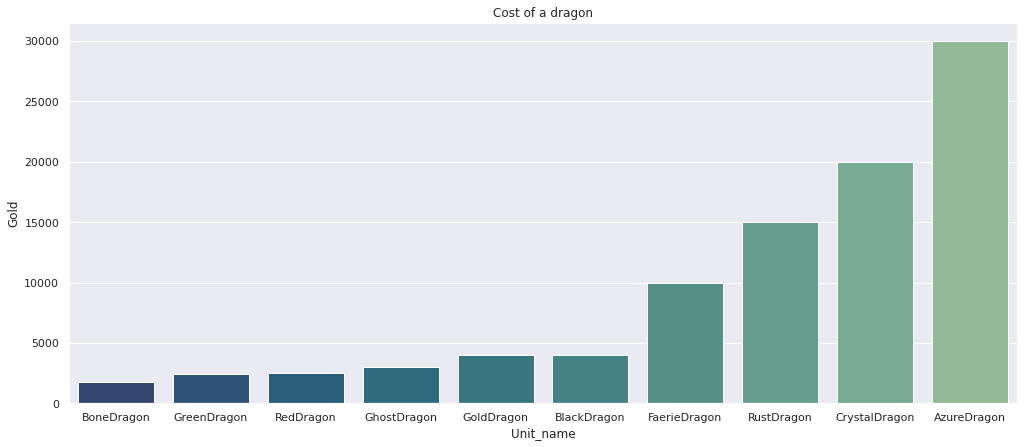

In [ ]:
plt.figure(figsize=(17,7))
title = "Cost of a dragon"
sns.set(font_scale=1)
sns.barplot(x=dragon['Unit_name'],y=dragon['Gold'],  palette='crest_r').set_title(title)

In [ ]:
df_flying_units = df.loc[df["Special_abilities"].str.contains("Flying") ]
df_flying_units = df_flying_units[["Castle", "Unit_name"]]
df_flying_units = df_flying_units.groupby(['Castle'], as_index=False).count()
df_flying_units

,Castle,Unit_name
0,Castle,4
1,Conflux,5
2,Dungeon,6
3,Fortress,4
4,Inferno,2
5,Necropolis,6
6,Neutral,3
7,Rampart,4
8,Stronghold,2
9,Tower,4


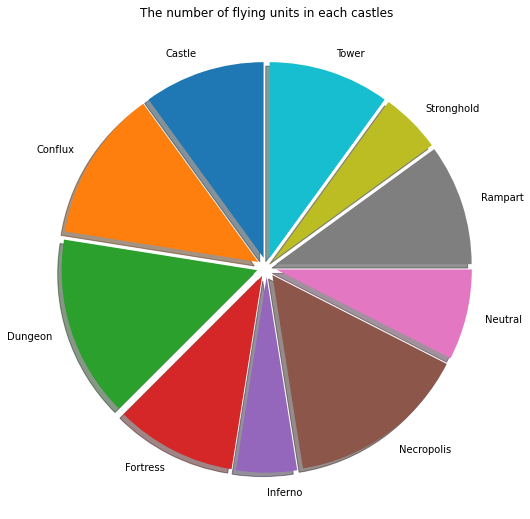

In [ ]:
labels = df_flying_units['Castle']
sizes = df_flying_units['Unit_name']
explode = [0.05] * len(df_flying_units['Castle'])

fig1, ax1 = plt.subplots(figsize=(15,9),)
ax1.pie(sizes, explode = explode,  labels=labels,
        shadow=True, startangle=90)
ax1.set_title('The number of flying units in each castles')
plt.show()

In [ ]:
df_ranged_units = df.loc[df["Special_abilities"].str.contains("Ranged") ]
df_ranged_units = df_ranged_units.groupby(['Castle'], as_index=False).count()
df_ranged_units

,Castle,Unit_name,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Special_abilities,Total_Cost
0,Castle,4,4,4,4,4,4,4,4,4,4,4,4,4
1,Conflux,2,2,2,2,2,2,2,2,2,2,2,2,2
2,Dungeon,4,4,4,4,4,4,4,4,4,4,4,4,4
3,Fortress,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Inferno,2,2,2,2,2,2,2,2,2,2,2,2,2
5,Necropolis,2,2,2,2,2,2,2,2,2,2,2,2,2
6,Neutral,3,3,3,3,3,3,3,3,3,3,3,3,3
7,Rampart,2,2,2,2,2,2,2,2,2,2,2,2,2
8,Stronghold,4,4,4,4,4,4,4,4,4,4,4,4,4
9,Tower,4,4,4,4,4,4,4,4,4,4,4,4,4
